<a href="https://colab.research.google.com/github/damianmtz98/Aprendizaje-Automatico-MCD/blob/main/Tarea%206%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 6 (10 puntos)**
* Investigar sobre algoritmos supervisados que puedan aplicarse a tu problema. Da un panorama sobre el modelo matemático que emplean y explica por qué conviene utilizarlo

* Investigar sobre métricas para analizar los errores de tus datos y discutirla (generalmente se usan MAE, MAPE, RMSE, MSE...)
* Aplicar al menos un algoritmo supervisado a tus datos para predecir alguna variable (puede ser interpolación o extrapolación)
* Actualiza literatura relacionada, metodología, resultados y discusión en tu artículo
* Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from prettytable import PrettyTable
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

In [83]:
hp1df = pd.read_csv('heart_prediction.csv')


In [84]:
hp1df = hp1df[['Chest pain type', 'Sex', 'Cholesterol', 'Exercise angina', 'Max HR', 'Age', 'Cardiopatia']]
hp1df.head()

,Chest pain type,Sex,Cholesterol,Exercise angina,Max HR,Age,Cardiopatia
0,4,1,322,0,109,70,0
1,3,0,564,0,160,67,1
2,2,1,261,0,141,57,0
3,4,1,263,1,105,64,1
4,2,0,269,1,121,74,1


In [85]:

print(hp1df.iloc[:10].to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 Chest pain type &  Sex &  Cholesterol &  Exercise angina &  Max HR &  Age &  Cardiopatia \\
\midrule
               4 &    1 &          322 &                0 &     109 &   70 &            0 \\
               3 &    0 &          564 &                0 &     160 &   67 &            1 \\
               2 &    1 &          261 &                0 &     141 &   57 &            0 \\
               4 &    1 &          263 &                1 &     105 &   64 &            1 \\
               2 &    0 &          269 &                1 &     121 &   74 &            1 \\
               4 &    1 &          177 &                0 &     140 &   65 &            1 \\
               3 &    1 &          256 &                1 &     142 &   56 &            0 \\
               4 &    1 &          239 &                1 &     142 &   59 &            0 \\
               4 &    1 &          293 &                0 &     170 &   60 &            0 \\
               4 &    0 &  

In [92]:
hp2df_pr = hp1df.tail(54)
hp2df = hp2df_pr.drop("Cardiopatia", axis = 1)
hp2df

,Chest pain type,Sex,Cholesterol,Exercise angina,Max HR,Age
216,3,0,252,0,172,63
217,3,1,227,1,154,51
218,3,1,258,0,147,54
219,2,1,220,0,170,44
220,4,1,239,1,126,54
221,4,1,254,0,127,65
222,3,1,168,0,174,57
223,4,1,330,1,132,63
224,4,0,183,0,182,35
225,2,1,203,0,132,41


In [93]:
hp1df = hp1df.drop(hp2df.index)
hp1df


,Chest pain type,Sex,Cholesterol,Exercise angina,Max HR,Age,Cardiopatia
0,4,1,322,0,109,70,0
1,3,0,564,0,160,67,1
2,2,1,261,0,141,57,0
3,4,1,263,1,105,64,1
4,2,0,269,1,121,74,1
...,...,...,...,...,...,...,...
211,3,1,245,0,166,51,1
212,3,0,213,0,165,43,1
213,4,1,216,1,131,58,0
214,2,1,204,0,202,29,1


In [99]:
xhp1 = hp1df.drop("Cardiopatia", axis=1)
yhp1 = hp1df["Cardiopatia"]
xhp2  = hp2df
xhp2.shape, yhp1.shape, xhp2.shape

((54, 6), (216,), (54, 6))

In [171]:
# GNB
gb = GaussianNB()
gb.fit(xhp1, yhp1)
ypredgnb = gb.predict(xhp2)
accgb = round(gb.score(xhp1, yhp1) * 100, 2)
accgb
     

78.7

In [102]:
# SVC
mcvs = SVC()
mcvs.fit(xhp1, yhp1)
accmcvs = round(mcvs.score(xhp1, yhp1) * 100, 2)
accmcvs

65.74

In [107]:
# KNN
kvc = KNeighborsClassifier(n_neighbors = 3)
kvc.fit(xhp1, yhp1)
acckvc = round(kvc.score(xhp1, yhp1) * 100, 2)
acckvc


76.85

In [108]:
# RF
ba = RandomForestClassifier(n_estimators=100)
ba.fit(xhp1, yhp1)
ypredba = ba.predict(xhp2)
ba.score(xhp1, yhp1)
accba = round(ba.score(xhp1, yhp1)* 100, 2)
accba

100.0

In [109]:
# Perceptron
ptron = Perceptron()
ptron.fit(xhp1, yhp1)
accptron = round(ptron.score(xhp1, yhp1) * 100, 2)
accptron

65.74

In [110]:
# LINEAR SVC
lmcvs = LinearSVC()
lmcvs.fit(xhp1, yhp1)
acclmcvs = round(lmcvs.score(xhp1, yhp1) * 100, 2)
acclmcvs

77.31

In [125]:
# LR
rlg = LogisticRegression()
rlg.fit(xhp1, yhp1)
predrlg = rlg.predict(xhp2)
accrlg = round(rlg.score(xhp1, yhp1) * 100, 2)
accrlg

77.78

In [113]:
# DTC
ad = DecisionTreeClassifier()
ad.fit(xhp1, yhp1)
ypredad = ad.predict(xhp2)
accad = round(ad.score(xhp1, yhp1) * 100, 2)
accad
     

100.0

In [114]:
# SGD CLASSIFIER
sgd = SGDClassifier()
sgd.fit(xhp1, yhp1)
accsgd = round(sgd.score(xhp1, yhp1) * 100, 2)
accsgd

47.69

In [116]:
modelos = pd.DataFrame({
    'Modelo': ['GNB', 'SVC', 'KNN', 'RF', 'PERCEPTRON', 'LINEAR SVC', 'LR', 'DTC', 'SGD CLASSIFIER'],
    'Porcentaje': [accgb, accmcvs, acckvc, accba, accptron, acclmcvs, accrlg, accad, accsgd]})
modelos.sort_values(by='Porcentaje', ascending=False)
     

,Modelo,Porcentaje
3,RF,100.00
7,DTC,100.00
0,GNB,78.70
6,LR,77.78
5,LINEAR SVC,77.31
2,KNN,76.85
1,SVC,65.74
4,PERCEPTRON,65.74
8,SGD CLASSIFIER,47.69


In [ ]:
hp3 = hp2df_pr['Cardiopatia']
hp3     

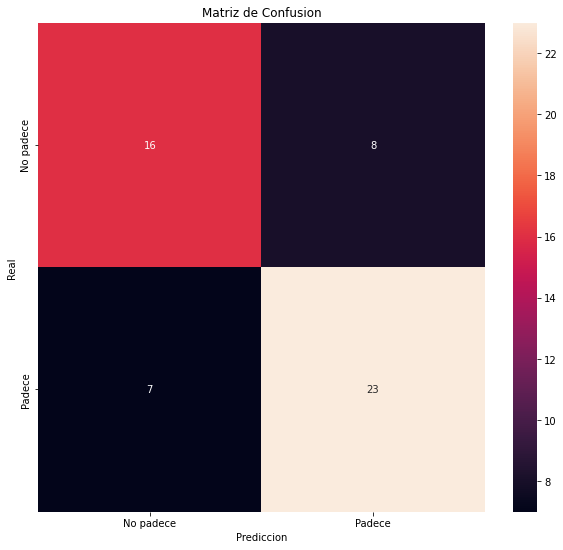

In [169]:
matrixc = confusion_matrix(hp3, ypredad)
plt.figure(figsize=(10,9))
xy = plt.subplot()
sns.heatmap(matrixc,annot = True, fmt ='g')
xy.set_xlabel('Prediccion')
xy.set_ylabel('Real')
xy.set_title('Matriz de Confusion')
xy.xaxis.set_ticklabels(['No padece','Padece'])
xy.yaxis.set_ticklabels(['No padece','Padece'])
plt.show()

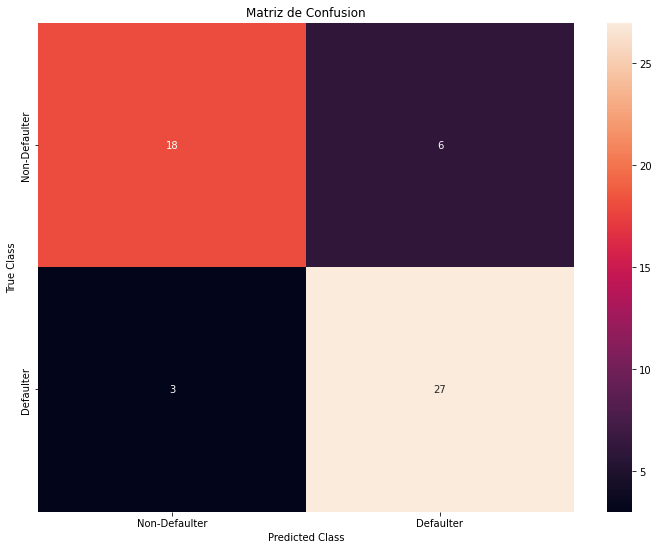

In [153]:
matrixc = confusion_matrix(hp3, ypredba)
plt.figure(figsize=(10,9))
xy = plt.subplot()
sns.heatmap(matrixc,annot = True, fmt ='g')
xy.set_xlabel('Prediccion')
xy.set_ylabel('Real')
xy.set_title('Matriz de Confusion')
xy.xaxis.set_ticklabels(['No padece','Padece'])
xy.yaxis.set_ticklabels(['No padece','Padece'])
plt.show()

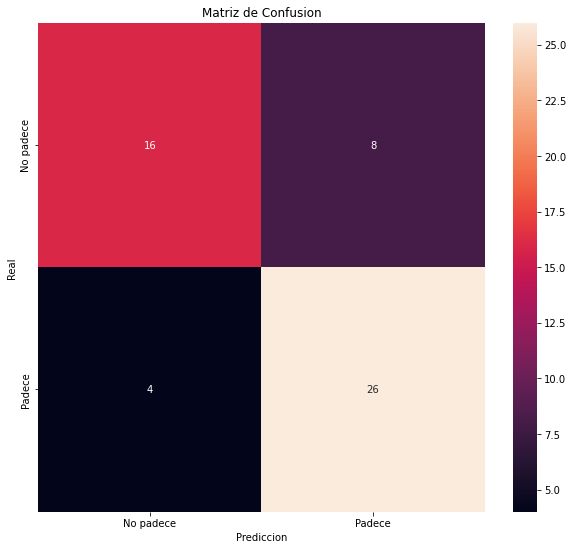

In [172]:
matrixc = confusion_matrix(hp3, ypredgnb)
plt.figure(figsize=(10,9))
xy = plt.subplot()
sns.heatmap(matrixc,annot = True, fmt ='g')
xy.set_xlabel('Prediccion')
xy.set_ylabel('Real')
xy.set_title('Matriz de Confusion')
xy.xaxis.set_ticklabels(['No padece','Padece'])
xy.yaxis.set_ticklabels(['No padece','Padece'])
plt.show()

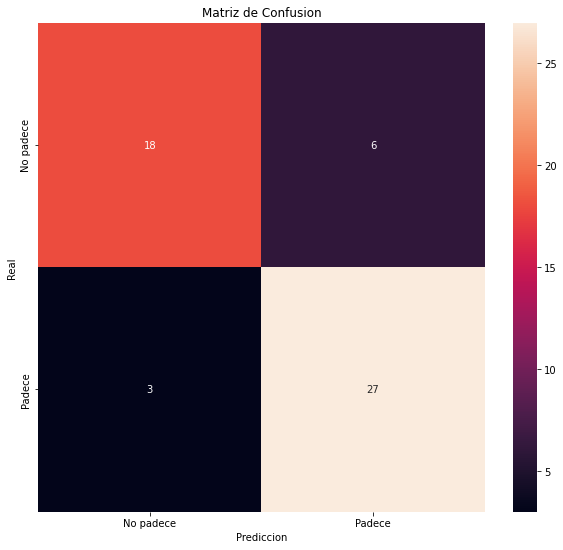

In [170]:
matrixc = confusion_matrix(hp3, predrlg)
plt.figure(figsize=(10,9))
xy = plt.subplot()
sns.heatmap(matrixc,annot = True, fmt ='g')
xy.set_xlabel('Prediccion')
xy.set_ylabel('Real')
xy.set_title('Matriz de Confusion')
xy.xaxis.set_ticklabels(['No padece','Padece'])
xy.yaxis.set_ticklabels(['No padece','Padece'])
plt.show()

In [150]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(hp3, ypredad)
print("Precisión:", precision)

recall = recall_score(hp3, ypredad)
print("Recall:", recall)

Precisión: 0.7419354838709677
Recall: 0.7666666666666667
